In [62]:
import pandas as pd
import numpy as np
import wbgapi as wb
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [154]:
country_codes = ["GBR","FRA", 'CAN', 'FIN', 'BEL', 'GRC', 'IRL', 'PAK', 'PHL', 'BGD'] 

country_names = {"GBR": 'United Kingdom', 
                 "FRA": 'France', 
                 "CAN": 'Canada', 
                 "FIN": 'Finland', 
                 "BEL": 'Belgium', 
                 "GRC": 'Greece',
                 "IRL": 'Ireland', 
                 "PAK": 'Pakistan',
                 "PHL": 'Philippines', 
                "BGD": "Bangladesh"}


country_groups = {
    "United Kingdom": 'High', 
    "France": 'High', 
    "Canada": 'High', 
    "Finland": 'High', 
    "Belgium": 'Medium', 
    "Greece": 'Medium',
    "Ireland": 'Medium', 
    "Pakistan": 'Low',
    "Philippines": 'Low', 
    "Bangladesh": 'Low'
                 }

In [155]:
indicator_ids = ["NY.GDP.MKTP.KD.ZG", "NY.GDP.PCAP.KD.ZG"]


In [156]:
df1  = wb.data.DataFrame(indicator_ids, country_codes, mrv=30) # most recent 30 years

df1 = df1.reset_index()

df1["series"].replace({"NY.GDP.MKTP.KD.ZG": "GDP growth", "NY.GDP.PCAP.KD.ZG": "GDP per capita"}, inplace=True)
df1.columns = ['Country', 'Indictor', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', 
               '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', 
               '2011', '2012','2013','2014','2015','2016','2017','2018', '2019', '2020']

df1.to_csv("Economy_data.csv", index = False)

In [157]:
df1['Country'] = df1['Country'].map(country_names)
df1.head()

,Country,Indictor,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Belgium,GDP growth,1.833074,1.530655,-0.961873,3.226972,2.384757,1.321451,3.793658,1.961808,...,1.694514,0.739217,0.459242,1.578533,2.041459,1.266686,1.619580,1.819204,2.149560,-5.659660
1,Belgium,GDP per capita,1.455372,1.119566,-1.348000,2.909319,2.170550,1.123669,3.542789,1.744324,...,0.380035,0.116403,-0.013148,1.128596,1.451893,0.755269,1.228866,1.356791,1.598970,-6.111257
2,Bangladesh,GDP growth,3.485228,5.442686,4.711562,3.890126,5.121278,4.522919,4.489896,5.177027,...,6.464379,6.521459,6.013606,6.061059,6.552640,7.113478,7.284174,7.863754,8.152684,3.509136
3,Bangladesh,GDP per capita,1.106647,3.114215,2.465582,1.690417,2.901244,2.319635,2.306677,3.014683,...,5.253547,5.299260,4.795196,4.855756,5.366866,5.946678,6.136478,6.733299,7.045289,2.476360
4,Canada,GDP growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.796542,...,3.146881,1.762223,2.329123,2.870036,0.659177,1.001394,3.039880,2.777041,1.879592,-5.233024


In [158]:
df1.insert(loc=0, column='country_groups', value=df1['Country'].map(country_groups))
df1.head()

,country_groups,Country,Indictor,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Medium,Belgium,GDP growth,1.833074,1.530655,-0.961873,3.226972,2.384757,1.321451,3.793658,...,1.694514,0.739217,0.459242,1.578533,2.041459,1.266686,1.619580,1.819204,2.149560,-5.659660
1,Medium,Belgium,GDP per capita,1.455372,1.119566,-1.348000,2.909319,2.170550,1.123669,3.542789,...,0.380035,0.116403,-0.013148,1.128596,1.451893,0.755269,1.228866,1.356791,1.598970,-6.111257
2,Low,Bangladesh,GDP growth,3.485228,5.442686,4.711562,3.890126,5.121278,4.522919,4.489896,...,6.464379,6.521459,6.013606,6.061059,6.552640,7.113478,7.284174,7.863754,8.152684,3.509136
3,Low,Bangladesh,GDP per capita,1.106647,3.114215,2.465582,1.690417,2.901244,2.319635,2.306677,...,5.253547,5.299260,4.795196,4.855756,5.366866,5.946678,6.136478,6.733299,7.045289,2.476360
4,High,Canada,GDP growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.146881,1.762223,2.329123,2.870036,0.659177,1.001394,3.039880,2.777041,1.879592,-5.233024


In [159]:
## features with missing values
for feature in df1.drop(['country_groups', 'Country', 'Indictor'], axis = 1).columns:
    mean = df1[feature].mean()
    std = df1[feature].std()
    is_null = df1[feature].isnull().sum()
    # Get random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in each feature column with random values generated
    feature_slice = df1[feature].copy()
    feature_slice[np.isnan(feature_slice)] = rand_age
    df1[feature] = feature_slice
##Check if any column still contain missing values
df1[feature].isnull().sum()

0

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scaler = StandardScaler()
data_rescale = scaler.fit_transform(df1.drop(['country_groups', 'Country', 'Indictor'], axis = 1))

In [162]:
data_rescale[:5, :]

array([[ 0.50003853,  0.14139853, -0.74828954,  0.15782468, -0.48919271,
        -1.02071372, -0.14073459, -0.45817251, -0.11879055, -0.3623622 ,
        -0.94852786, -0.50579237, -1.1250111 , -0.42062867, -0.51679616,
        -0.84435073, -0.2630302 ,  0.0188854 ,  0.13616062,  0.31117072,
         0.16728793, -0.02912486, -0.45675791, -0.54224415, -0.35708253,
        -0.54049446, -0.88035066, -0.65912171, -0.21958646, -0.23168851],
       [ 0.36494732, -0.00714844, -0.95357705, -0.09135205, -0.58504023,
        -1.12935537, -0.22851082, -0.54315049, -0.22490973, -0.50460655,
        -1.19372631, -0.82998929, -1.37244757, -0.71370428, -0.82136783,
        -1.29686127, -0.70075462, -0.2695336 , -0.08026303,  0.00391584,
        -0.16185857, -0.2052222 , -0.6432491 , -0.71235282, -0.44132033,
        -0.75668785, -1.04001472, -0.83439877, -0.46106816, -0.32057815],
       [ 1.09095706,  1.55501005,  2.26804225,  0.67802407,  0.73527105,
         0.73785364,  0.10287196,  0.79811456,  0

In [163]:
from sklearn.cluster import KMeans

In [164]:
def ElbowPlot(X, k_min, k_max):
    wss = [ ]
    for i in range(k_min, k_max+1):
        kmeans = KMeans(n_clusters = i, random_state = 2600)
        kmeans.fit(X)
        wss.append(kmeans.inertia_)
    plt.figure(figsize=(15,5))
    plt.plot(range(k_min, k_max+1), wss, '-o')
    plt.title('Elbow plot to find best number of clusters')
    plt.xlabel('Number of cluster k')
    plt.ylabel('Within group Sum of Square')
    plt.show()

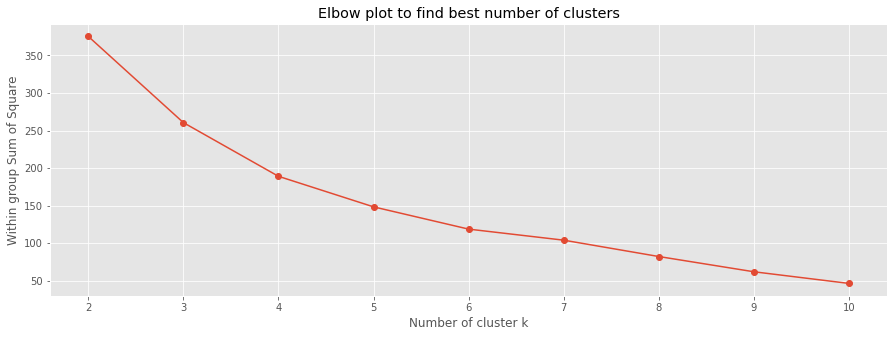

In [165]:
ElbowPlot(data_rescale, k_min = 2, k_max = 10)

In [181]:
def kmean_clustering():
    
    kmeans = KMeans(n_clusters = param, random_state = 2600).fit(data_rescale)
    return kmeans
kmean_clustering()

KMeans(n_clusters=3, random_state=2600)

In [180]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0])

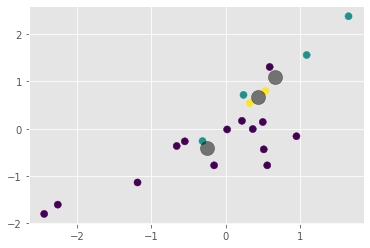

In [176]:
plt.scatter(data_rescale[:, 0], data_rescale[:, 1], c=kmeans_labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [169]:
df1.insert(loc=1, column='Predicted_labels', value=kmeans_labels)

In [177]:
from err_ranges import err_ranges